In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set(style='whitegrid')

Step_By_Step plan
Step:1 Load and inspect the dataset
Step:2 clean and progress the data
Step:3 Analyzie funding trends over time
Step:4 Identity top funded sectors,cities,startup
Step:5 Analyzie investment types and stages
Step:7 Correlation analysis
Step:8 Identity

In [ ]:
#Step:1 Load ans inspect the dataset
import pandas as pd # Moved import outside the function

def readscsv(filepath,filename):
  import os
  # os.chdir(filepath) # No need to change directory if using the full path
  file = pd.read_excel(os.path.join(filepath, filename)) # Use os.path.join for better path handling

  return file

filepath = "/content/drive/MyDrive/Day1" # Correct filepath
filename = "startup_funding123.xlsx" # Correct filename

df = readscsv(filepath,filename)

In [ ]:
#inspect first few rows
print("first 5 rows:")
print(df.head())

#Basic info
print("\ndataset info:")
print(df.info())

#check for missing values
print("nMissing Values")
print(df.isnull().sum())


first 5 rows:
   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Privat

In [ ]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks'],
      dtype='object')

In [ ]:
#Fill missing values
df['Industry_Vertical'] =df['Industry_Vertical'].fillna('Others')
df['SubVertical'] =df['SubVertical'].fillna('Not Specified')
df['City_Location'] =df['City_Location'].fillna('Not Specified')
df['Investors_Name'] =df['Investors_Name'].fillna('Not Specified')

In [ ]:
#Convert data columns to datatime and extract year/month
df['date'] =pd.to_datetime(df['Date'],errors='coerce')
df['year'] =df['date'].dt.year
df['month'] =df['date'].dt.month

In [ ]:
#Apply the function to the Next Column
df['Amount_In_INR'] =df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())


In [ ]:
#Save column data
df.to_csv("cleaned_startup_funding.csv", index=False)

Step:3 Funding Trends over time
Objective: Analyze how funding has evolved year-over-year and
moth-over-month
Explanation:
.A countplot shows the number of funding deals over the year
.A line plot shows total funding amount per year,helping growth or decline trends

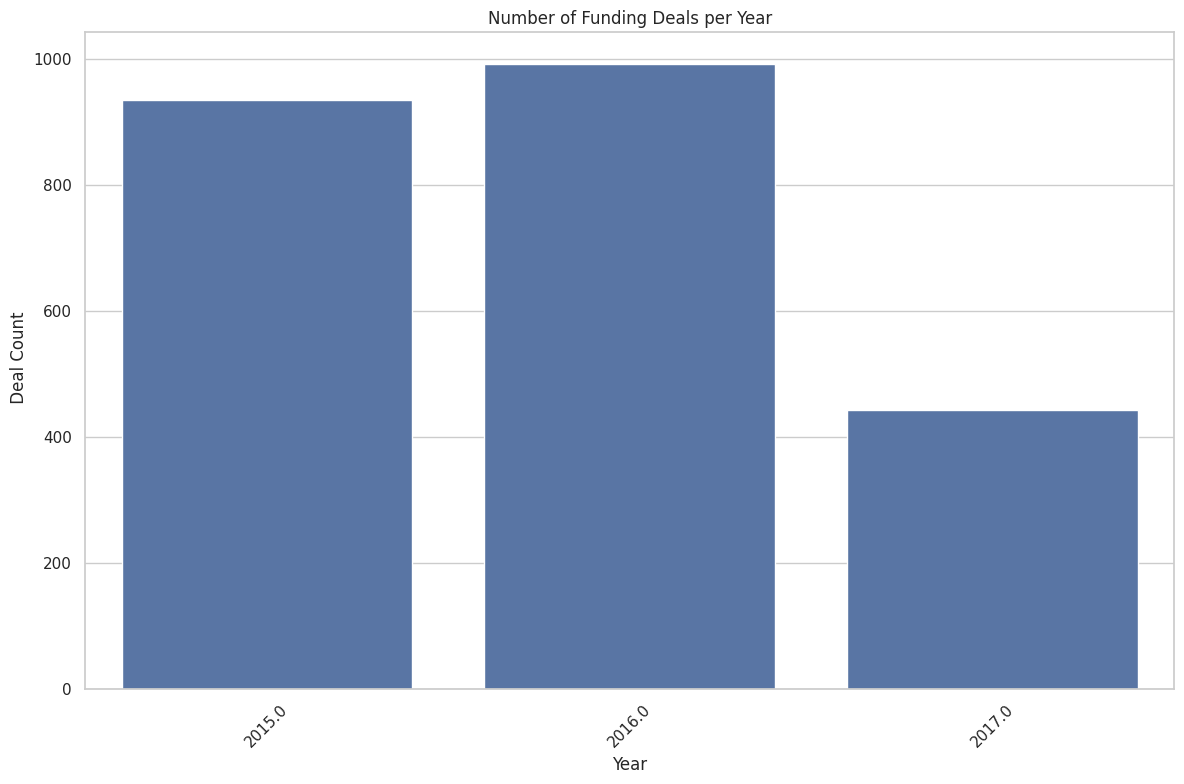

In [ ]:
#Number of deals per year
plt.figure(figsize=(12,8))
sns.countplot(x='year',data=df)
plt.title("Number of Funding Deals per Year")
plt.xlabel("Year")
plt.ylabel(" Deal Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

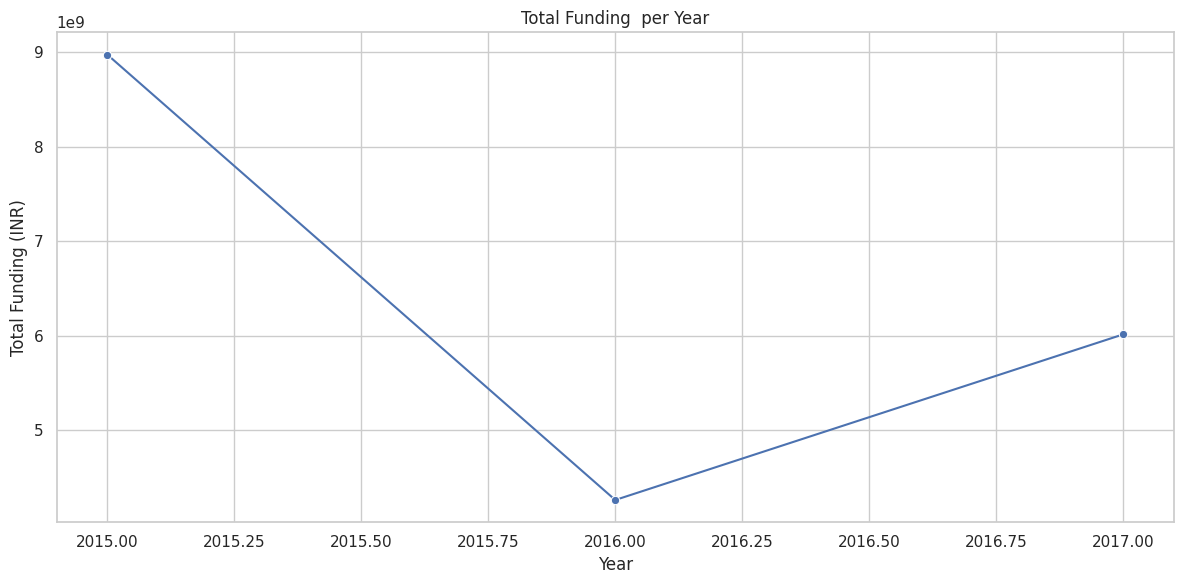

In [ ]:
# Total funding per year
yearly_funding = df.groupby('year')['Amount_In_INR'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='Amount_In_INR',data=yearly_funding, marker='o')
plt.xlabel("Year")
plt.title("Total Funding  per Year")
plt.ylabel("Total Funding (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()


Step:4 Top Funded Sectors Cities and startups


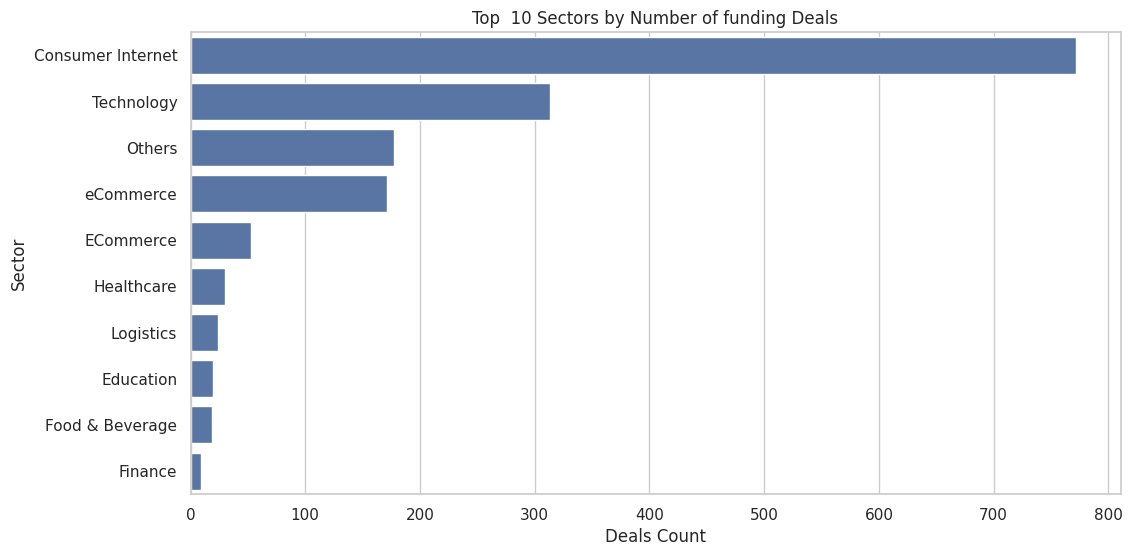

In [ ]:
# Top sectors by deals count
top_sectors = df['Industry_Vertical'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_sectors.values, y=top_sectors.index)
plt.title("Top  10 Sectors by Number of funding Deals")
plt.xlabel("Deals Count")
plt.ylabel("Sector")
plt.show()

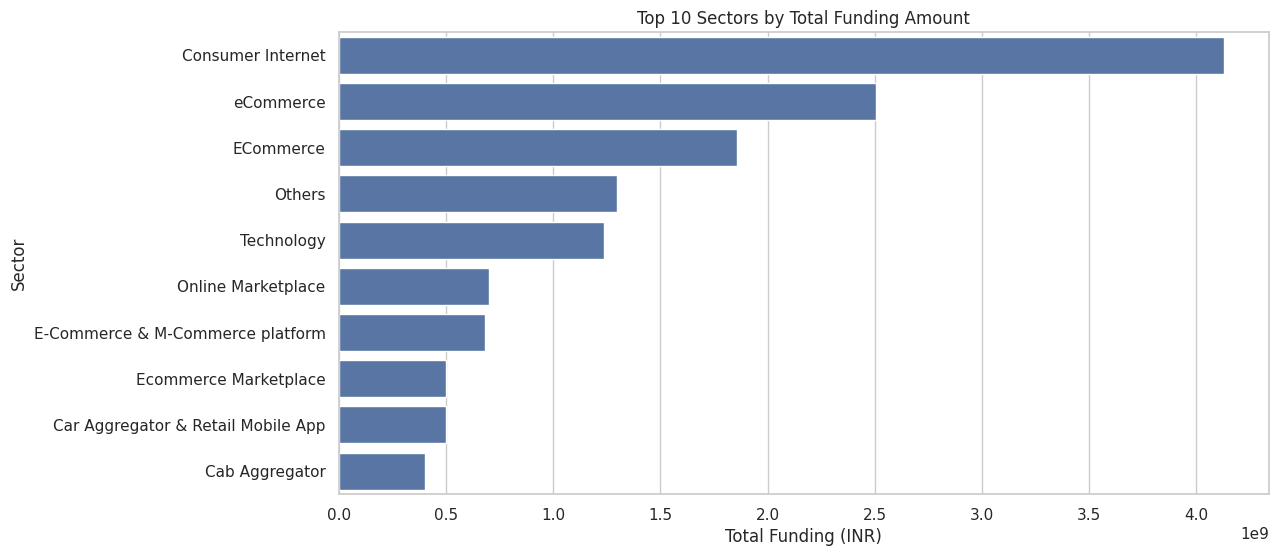

In [ ]:
# Top Sectors by total funding
df['Industry_Vertical'] = df['Industry_Vertical'].replace(['E-Commerce','Ecommerce'])
sector_funding = df.groupby('Industry_Vertical')['Amount_In_INR'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=sector_funding.values, y=sector_funding.index)
plt.title("Top 10 Sectors by Total Funding Amount")
plt.xlabel("Total Funding (INR)")
plt.ylabel("Sector")
plt.show()


Step:5 Investor Analysis

In [ ]:
# Split multiple investor and count
investor_df = df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investor_df['Investors_Name'] = investor_df['Investors_Name'].str.split(',')
investor_df = investor_df.explode('Investors_Name').dropna()
investor_df['Investors_Name'] = investor_df['Investors_Name'].str.strip().str.title()

In [ ]:
# investors_df

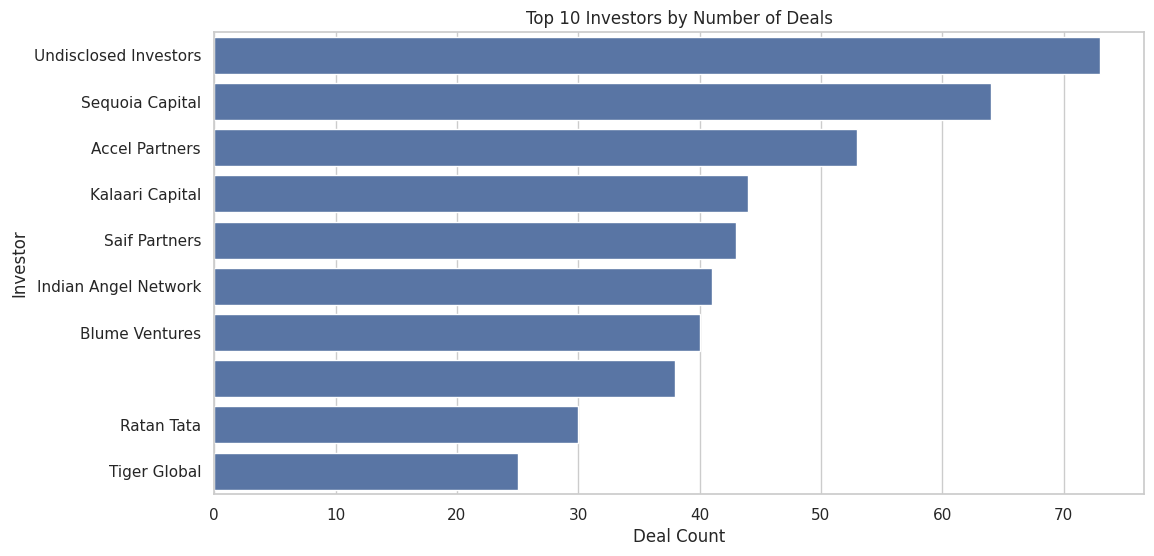

In [ ]:
# Top investors by number of deals
top_investors = investor_df['Investors_Name'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_investors.values, y=top_investors.index)
plt.title("Top 10 Investors by Number of Deals")
plt.xlabel("Deal Count")
plt.ylabel("Investor")
plt.show()

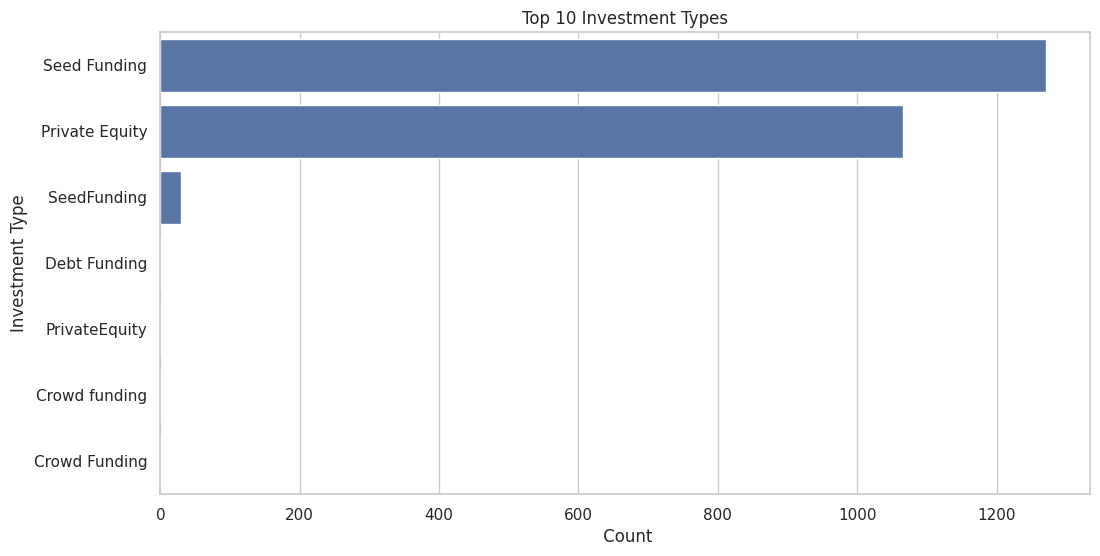

In [ ]:
investment_type = df['InvestmentType'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=investment_type.values, y=investment_type.index)
plt.title("Top 10 Investment Types")
plt.xlabel(" Count")
plt.ylabel("Investment Type")
plt.show()

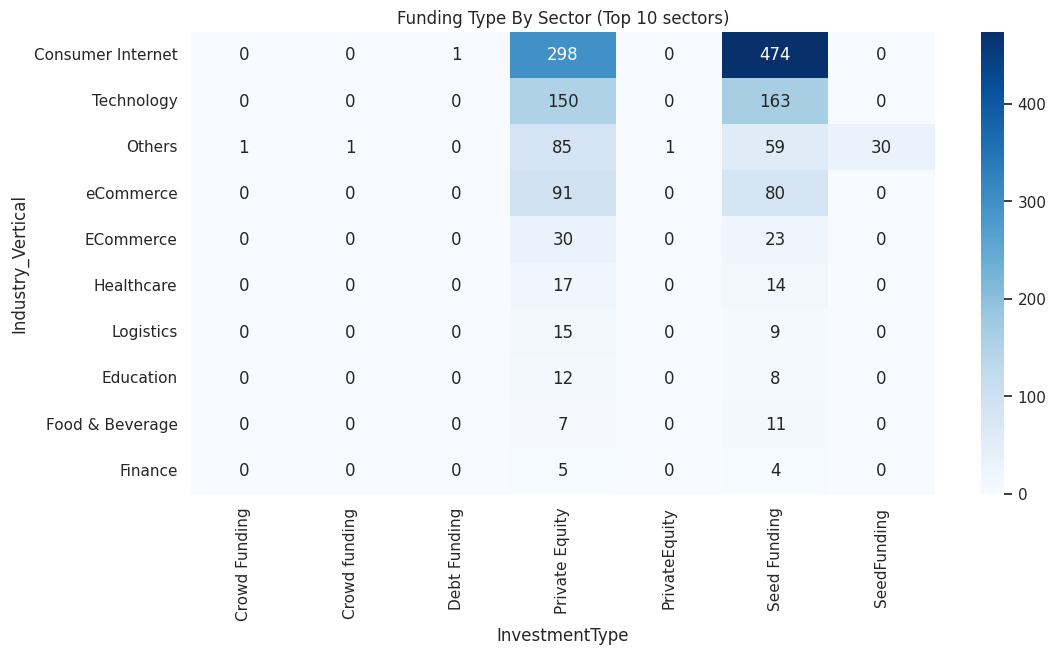

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'],df['InvestmentType'])
sector_stage = sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]

plt.figure(figsize=(12,6))
sns.heatmap(sector_stage, annot=True, fmt='d', cmap='Blues')
plt.title("Funding Type By Sector (Top 10 sectors)")
plt.show()

Step: Funding Distribution and Outliers

Objeactive: Uderstand how funding is distribution and identify outliers

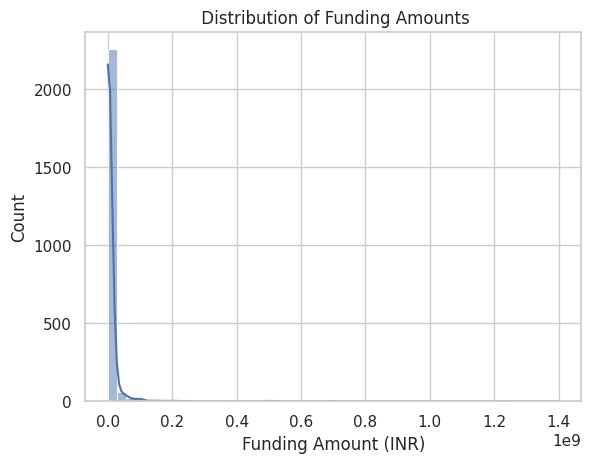

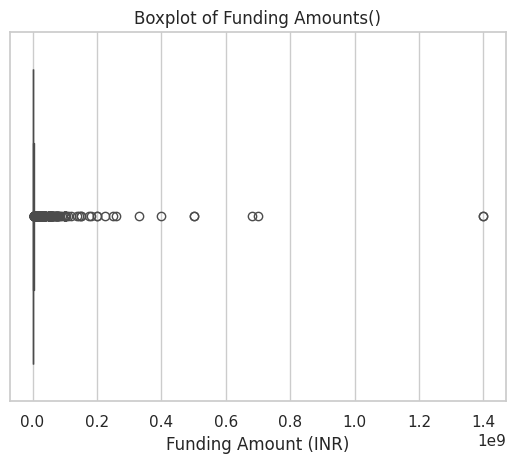

In [ ]:
import seaborn as sns
sns.histplot(df['Amount_In_INR'],bins=50,kde=True)
plt.title(" Distribution of Funding Amounts")
plt.xlabel("Funding Amount (INR)")
plt.show()

sns.boxplot(x=df['Amount_In_INR'])
plt.title("Boxplot of Funding Amounts()")
plt.xlabel("Funding Amount (INR)")
plt.show()

Step:9 Growth Trend of Top Sector

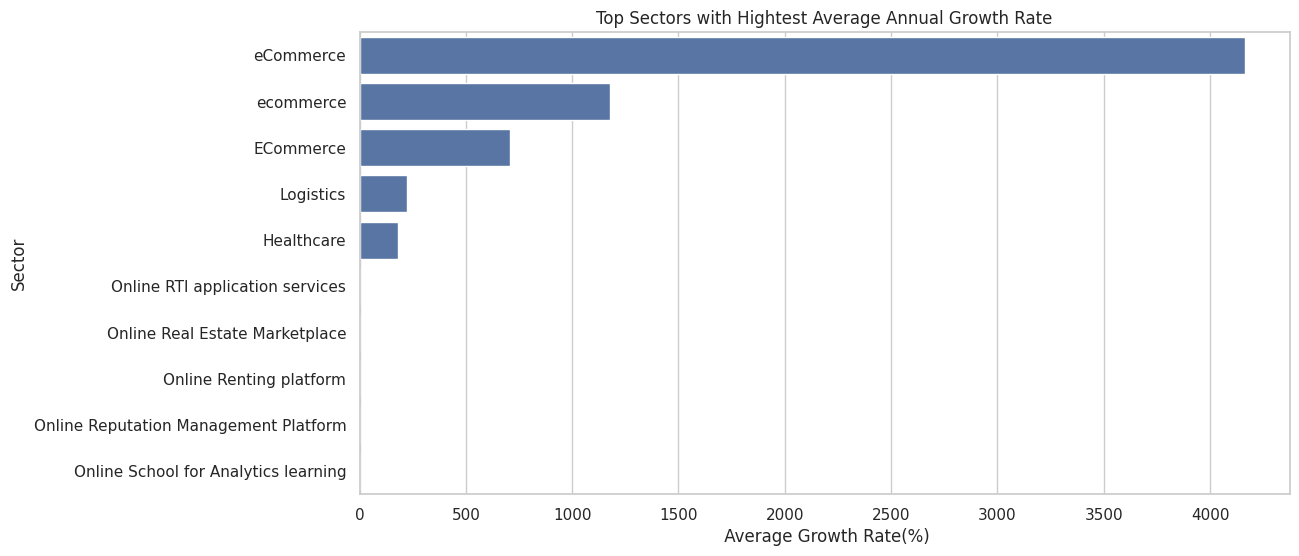

In [ ]:
sector_yearly = df.groupby(['year','Industry_Vertical'])['Amount_In_INR'].sum().unstack()#.fillna(0)
sector_growth = sector_yearly.pct_change().mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=sector_growth.values *100,  y=sector_growth.index)
plt.title("Top Sectors with Hightest Average Annual Growth Rate")
plt.xlabel(" Average Growth Rate(%)")
plt.ylabel("Sector")
plt.show()

In [ ]:
investor_df = df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investor_df['Investors_Name'] = investor_df['Investors_Name'].str.split(',')
investor_df = investor_df.explode('Investors_Name').dropna()
investor_df['Investors_Name'] = investor_df['Investors_Name'].str.strip().str.title()

In [ ]:
def classify_investor(name):
  name = name.lower()
  if any(word in name for word in ['captical','ventures','partners','fund','vc','labs']):
    return 'VC'
  elif any(word in name for word in ['angle','network']):
    return 'Angle'
  elif any(word in name for word in ['crop','limited','pvt','ltd','lnc']):
    return 'Corporate'
  else:
    return 'Other'

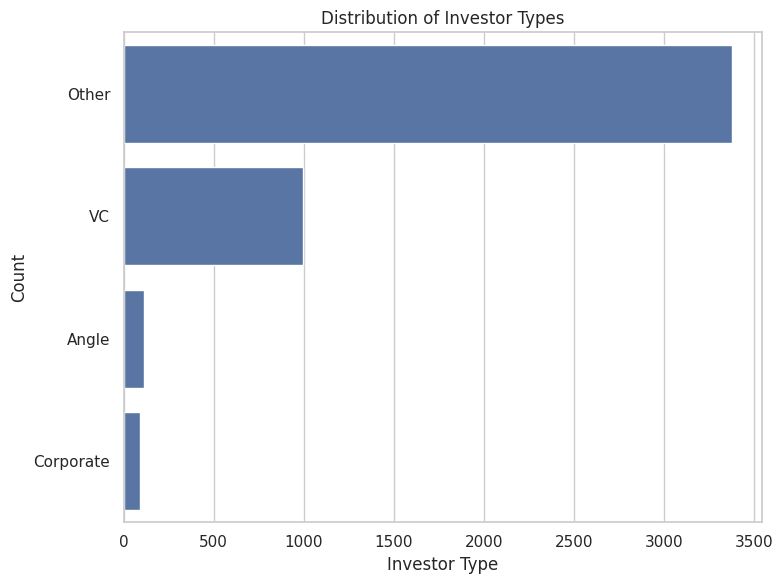

In [ ]:
investor_df['Investor_Type'] = investor_df['Investors_Name'].apply(classify_investor)
investor_type_counts = investor_df['Investor_Type'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=investor_type_counts.values, y=investor_type_counts.index)
plt.title(" Investor Types Distribution")
plt.xlabel("Investor Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

3. Repeat investment Analysis


In [ ]:
investor_df = df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investor_df['Investors_Name'] = investor_df['Investors_Name'].str.split(',')
investor_df = investor_df.explode('Investors_Name').dropna()
investor_df['Investors_Name'] = investor_df['Investors_Name'].str.strip().str.title()

In [ ]:
#Count how many an investor in the startup
investor_startup_counts = investor_df.groupby('Investors_Name')['StartupName'].size().reset_index(name='Dev')
repeat_investors = investor_startup_counts[investor_startup_counts['Dev']>1]

repeat_investors_summary = repeat_investors.groupby('Investors_Name')['Dev'].sum().sort_values(ascending=False).head(10)

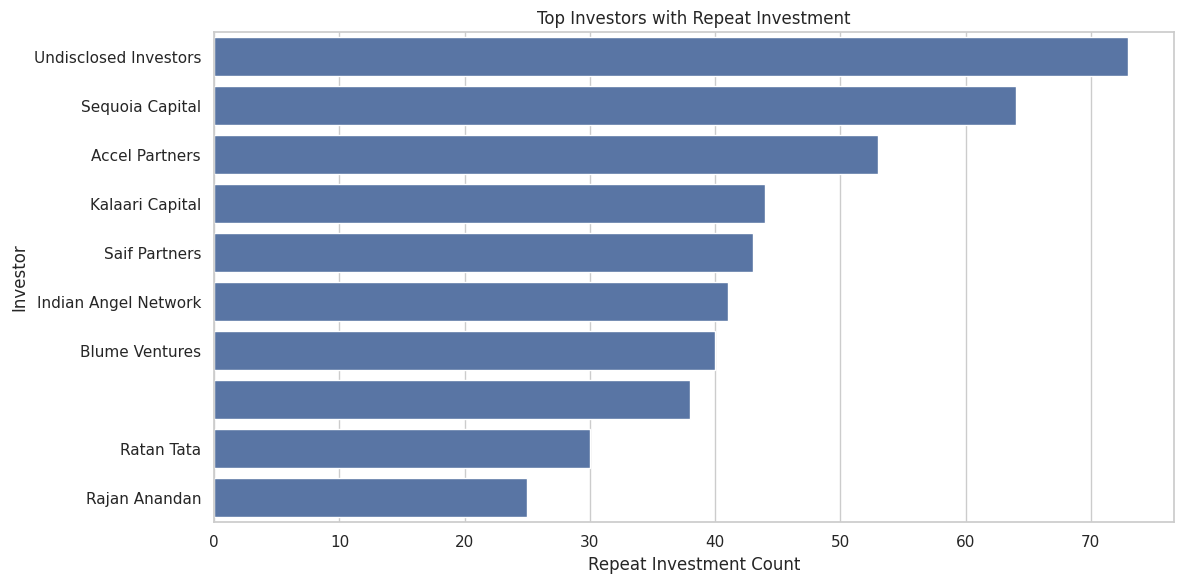

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=repeat_investors_summary.values, y=repeat_investors_summary.index)
plt.title("Top Investors with Repeat Investment")
plt.xlabel("Repeat Investment Count")
plt.ylabel("Investor")
plt.tight_layout()
plt.show()

Funding Stage Analysis

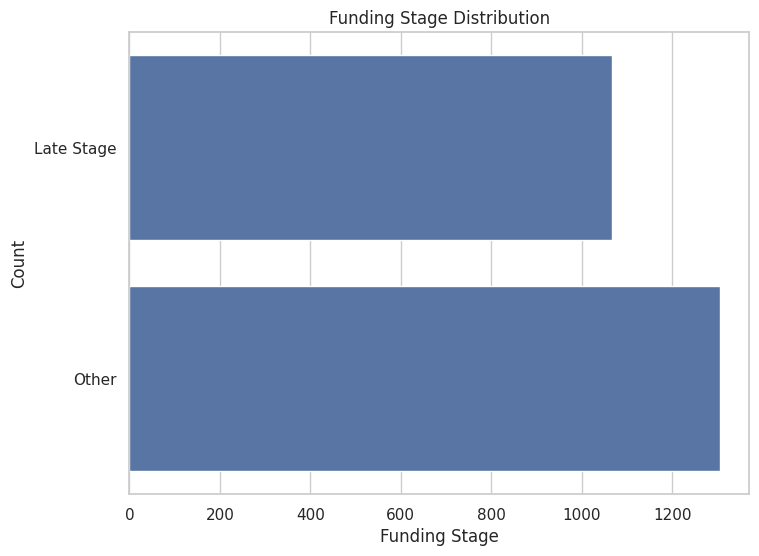

In [ ]:
# Define stage categories
early_stage =['Seed','PreSeed','Angle']
late_stage =['Series A','Series B','Series C','Series D','Series E','Private Equity','Venture Debt','Debt Funding']

df['Funding_stage'] = df['InvestmentType'].str.strip().str.title()
df['Funding_Stage'] = df['Funding_stage'].apply(lambda x: 'Early Stage' if x in early_stage else ('Late Stage' if x in late_stage else 'Other'))

#plot
plt.figure(figsize=(8,6))
sns.countplot(y='Funding_Stage',data=df,)
plt.title("Funding Stage Distribution")
plt.xlabel("Funding Stage")
plt.ylabel("Count")
plt.show()

Funding Types vs Sectors (Stacked Bar Chart)

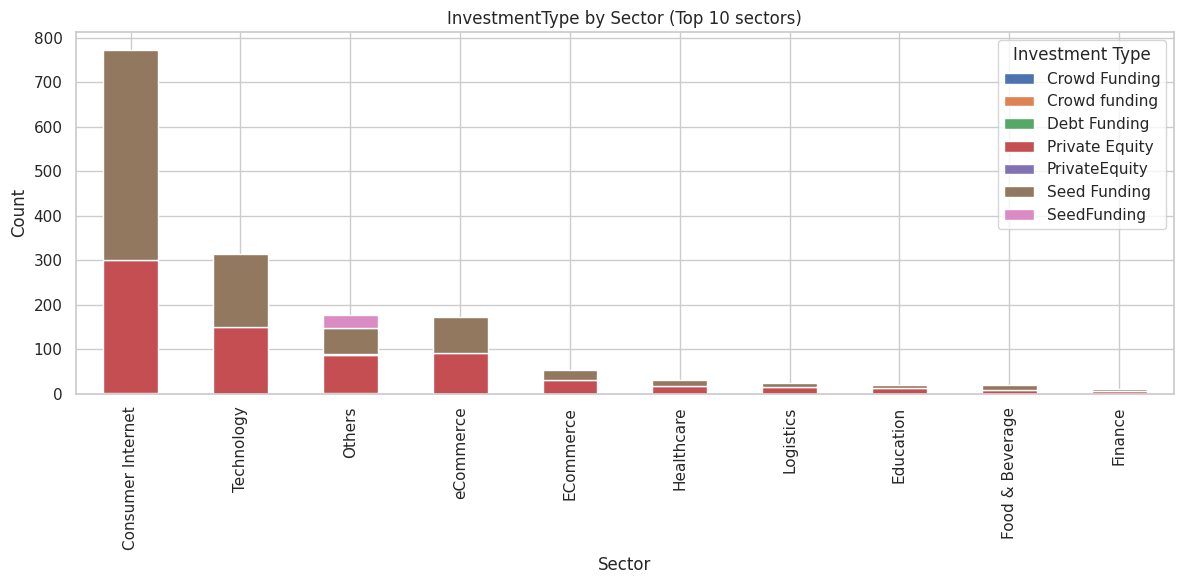

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'],df['InvestmentType'])
sector_stage = sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]

sector_stage.plot(kind='bar',stacked=True,figsize=(12,6))
plt.title("InvestmentType by Sector (Top 10 sectors)")
plt.xlabel("Sector")
plt.ylabel("Count")
plt.legend(title='Investment Type')
plt.tight_layout()
plt.show()